In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import torch
import torchvision.transforms as transforms
from models.crnn import init_network
from datasets.datahelpers import default_loader
from utils.converter import LabelConverter

In [2]:
# load alphabet from file
alphabet = ''
with open('./data/alphabet_decode_5990.txt', mode='r', encoding='utf-8') as f:
    for line in f.readlines():
        alphabet += line.strip()

In [3]:
img_name = './data/images/54439593_2298493320.jpg'
device = torch.device("cuda")
model_path = './checkpoint/model/densenet121_pretrained.pth'

model_params = {}
model_params['architecture'] = "densenet121"
model_params['num_classes'] = len(alphabet) + 1
model_params['mean'] = (0.5,)
model_params['std'] = (0.5,)
model = init_network(model_params)
model = model.to(device)

# load checkpoint
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)

converter = LabelConverter(alphabet, ignore_case=False)

transform = transforms.Compose([
    transforms.Resize((32, 280)),
    transforms.ToTensor(),
    transforms.Normalize(mean=model.meta['mean'], std=model.meta['std']),
])

print('image name: {}'.format(img_name))
img = default_loader(img_name)

image name: ./data/images/54439593_2298493320.jpg


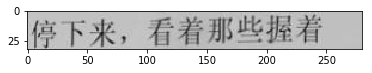

In [4]:
plt.imshow(img)

In [5]:
# transform
img = transform(img)
img = img.unsqueeze(0)
img = img.to(device)

In [6]:
with torch.no_grad():
    log_probs = model(img)
    preds_strs = converter.best_path_decode(log_probs, strings=True).decode('utf-8')
    preds = converter.best_path_decode(log_probs, raw=True).decode('utf-8')

    print('pred: {}'.format(preds))
    print('pred strings: {}'.format(preds_strs))

pred: -停--下--来--，--看--着--那--些--握--着------
pred strings: 停下来，看着那些握着
